In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import best_model

In [2]:
#Errors
match_error = pd.read_csv('/opt/pwdata/katie/csc2.1/matching_error.txt', skiprows=1, names=['ids'])
fit_error = pd.read_csv('/opt/pwdata/katie/csc2.1/fitting_error.txt', skiprows=1, names=['ids'])
wav_error = pd.read_csv('/opt/pwdata/katie/csc2.1/wavdetect_error.txt', skiprows=1, names=['ids'])

#Other
stats =  pd.read_csv('/opt/pwdata/katie/csc2.1/stats.csv')
compton = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_compton_list.txt', skiprows=1, names=['ids'])
triply_unabsorbed_list = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/triply_unabsorbed_list.txt', skiprows=1, names=['ids'])

final_min_abs = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_min_abs_full.csv')
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')

In [26]:
#Get total repositories, tells us how many combos of obsid and target there are
total = [file for file in os.listdir('/opt/pwdata/katie/csc2.1') if not file.startswith('._')]
total = set([entry for entry in total if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1', entry))])

In [23]:
#Check compton thick in all different versions
main = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio.csv')
main_compton = set(main.loc[main['compton thick']=='True']['# ObsID'])
res = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_res.csv')
res_compton = set(res.loc[res['compton thick']=='True']['# ObsID'])
alt = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_alt.csv')
alt_compton = set(alt.loc[alt['compton thick']=='True']['# ObsID'])

In [ ]:
#Get lists of the repositories put in all the different spots
final_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/final_data') if not file.startswith('._')]
final_reps = set([entry for entry in final_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/final_data', entry))])
main_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs') if not file.startswith('._')]
main_reps = set([entry for entry in main_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs', entry))])
alt_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_alt') if not file.startswith('._')]
alt_reps = set([entry for entry in alt_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_alt', entry))])
res_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_res') if not file.startswith('._')]
res_reps = set([entry for entry in res_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_res', entry))])

In [28]:
#Printing out stuff
print(f"Ran code for {len(total)} obsid-object combos")
print(f"Wavdetect errors: {len(wav_error)}")
print(f"Match region errors: {len(match_error)}")
print(f"Sherpa fitting errors: {len(fit_error)}")
print()
print(f"Compton thick candidates in 'best' model: {len(compton)}")
print(f"Main Compton thick candidates: {len(main_compton)}")
print(f"Alt Compton thick candidates: {len(alt_compton)}")
print(f"Res Compton thick candidates: {len(res_compton)}")
print(f"Compton thick in at least one model: {len(main_compton | alt_compton | res_compton)}")
print()
print(f'Total "best" min abs using my current best model method: {len(final_reps)}')
print(f'Total main fit min abs: {len(main_reps)}')
print(f'Total alt fit min abs: {len(alt_reps)}')
print(f'Total res fit min abs: {len(res_reps)}')
print(f'Total min abs in at least one fit: {len(main_reps | alt_reps | res_reps )}')
print(f"Triply unabsorbed: {len(triply_unabsorbed_list)}")

Ran code for 2010 obsid-object combos
Wavdetect errors: 240
Match region errors: 805
Sherpa fitting errors: 98

Compton thick candidates in 'best' model: 0
Main Compton thick candidates: 42
Alt Compton thick candidates: 39
Res Compton thick candidates: 46
Compton thick in at least one model: 51

Total "best" min abs using my current best model method: 56
Total main fit min abs: 217
Total alt fit min abs: 60
Total res fit min abs: 84
Total min abs in at least one fit: 226
Triply unabsorbed: 24


Index(['# ObsID', 'Cstat', 'nH', 'nH error plus', 'nH error minus', 'gamma',
       'gamma error plus', 'gamma error minus', '0.3-7.5 flux',
       'xflux error plus', 'xflux_error_minus', '2-10 flux',
       'flux210 error plus', 'flux210 error minus', 'Soft flux',
       'fluxsoft error plus', 'fluxsoft error minus', 'Medium flux',
       'fluxmed error plus', 'fluxmed error minus', 'Hard flux',
       'fluxhard error plus', 'fluxhard error minus', 'Sum flux',
       'fluxsum error plus', 'fluxsum error minus', 'Test Statistic', 'Ce',
       'Cv', 'CXO name', 'RA', 'Dec', 'Z', 'galactic nH', 'counts',
       'luminosity', 'luminosity error', 'Flux_OIII_5006',
       'Flux_OIII_5006_err', 'Fx/F[OIII]', 'Fx/F[OIII].1', 'compton thick'],
      dtype='object')


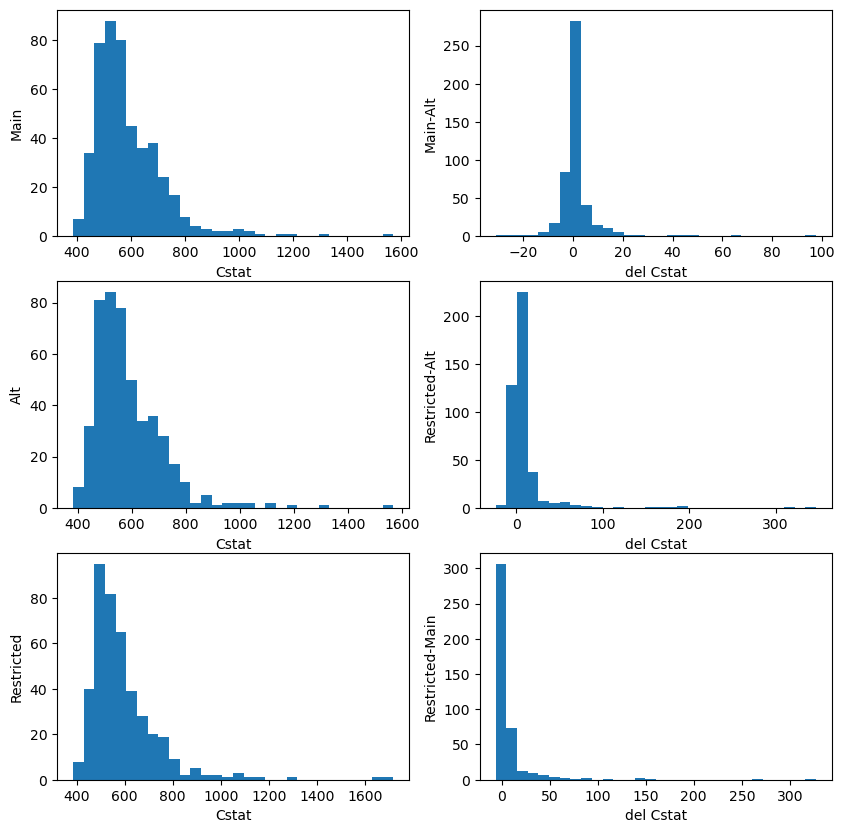

In [33]:
#Get some histograms to determine where our best model cutoff should be
%matplotlib inline
best_model.make_histograms('/opt/pwdata/katie/csc2.1', 30, 30)